In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# Configure matplotlib plotting
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 #Changes default matplotlib plots to this size

In [2]:
data = pd.read_csv("loads1.csv")

# PREPROCESSING

In [3]:
# Load the Data
data = pd.read_csv("loads1.csv")

data.set_index('date',inplace=True)

data.index = pd.to_datetime(data.index)

data_copy = data.copy(deep=True) # Make a deep copy, including a copy of the data and the indices
data.head(10)

,Loads,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
date,,,,,,,,
2012-01-01 01:00:00,24659.16,0,0,0,1,0,0,0
2012-01-01 02:00:00,23387.59,0,0,0,1,0,0,0
2012-01-01 03:00:00,22090.76,0,0,0,1,0,0,0
2012-01-01 04:00:00,21009.12,0,0,0,1,0,0,0
2012-01-01 05:00:00,20350.99,0,0,0,1,0,0,0
2012-01-01 06:00:00,20442.18,0,0,0,1,0,0,0
2012-01-01 07:00:00,20910.78,0,0,0,1,0,0,0
2012-01-01 08:00:00,21393.44,0,0,0,1,0,0,0
2012-01-01 09:00:00,21909.23,0,0,0,1,0,0,0


In [4]:
data=data[['Loads']]

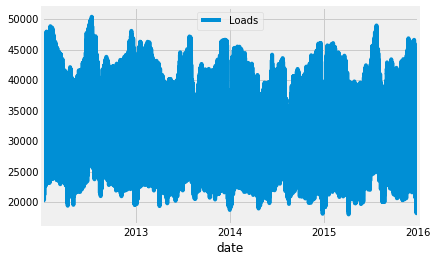

In [5]:
data.plot()

plt.show()

In [6]:
# Given there's no missing data, we can resample the data to daily level
daily_data = data.resample(rule='D').sum()

# Set frequency explicitly to D
daily_data = daily_data.asfreq('D')

daily_data.head(10)

,Loads
date,
2012-01-01,578549.33
2012-01-02,760442.62
2012-01-03,791960.20
2012-01-04,790213.19
2012-01-05,778888.18
2012-01-06,655445.74
2012-01-07,682400.54
2012-01-08,633861.58
2012-01-09,842063.42


In [7]:
daily_data.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq='D')

In [8]:
daily_data = daily_data.drop([daily_data.index.min(), daily_data.index.max()])

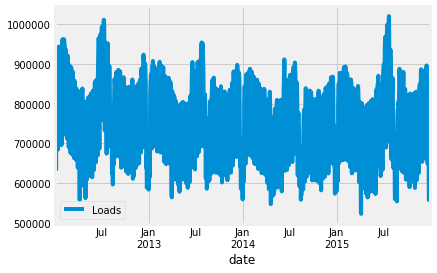

In [9]:
daily_data.plot()

plt.show()

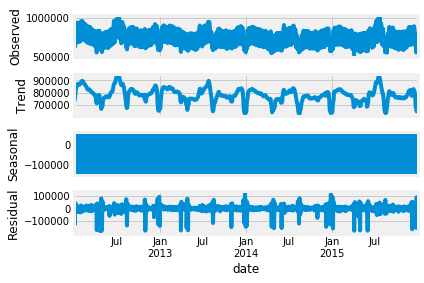

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_data, model='additive')

fig = decomposition.plot()
plt.show()

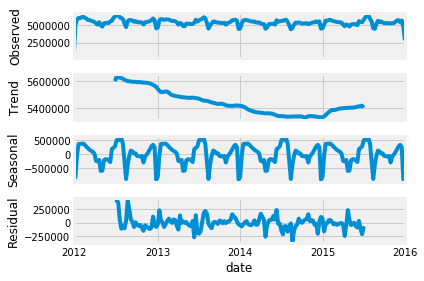

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
weekly_data = data.resample(rule='W').sum()
decomposition = seasonal_decompose(weekly_data, model='additive') # Aggregate to weekly level

fig = decomposition.plot()
plt.show()

In [12]:
data=data.loc['2012-01-01':'2015-12-31']

In [13]:
# Create new dataset for heatmap
heatmap_data = daily_data.copy()

# First we need to add weekdays as a column
heatmap_data['Weekday_Name'] = daily_data.index.weekday_name

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Weekday_Name']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# We drop off 2018 because it's not a full year
heatmap_data = heatmap_data[heatmap_data['Year'] != 2018]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Weekday_Name', values='Loads')

# Reorder columns
heatmap_data = heatmap_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

heatmap_data.head(100)

Weekday_Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,4.367322e+07,4.442413e+07,4.448418e+07,4.458788e+07,4.421361e+07,3.825897e+07,3.431674e+07
2013,4.171126e+07,4.392204e+07,4.330977e+07,4.301330e+07,4.281175e+07,3.711395e+07,3.331723e+07
2014,4.008174e+07,4.228191e+07,4.324653e+07,4.232835e+07,4.182012e+07,3.632965e+07,3.237433e+07
2015,4.085259e+07,4.258057e+07,4.343855e+07,4.393673e+07,4.269624e+07,3.661496e+07,3.250327e+07


Text(0.5, 1, 'Heatmap - by Day of Week')

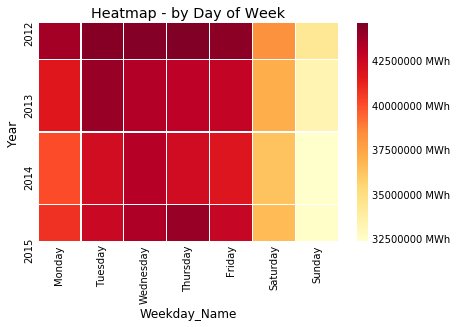

In [14]:
# Visualise electricity load via Heatmap
sns.heatmap(heatmap_data, linewidths=.7, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Day of Week')

In [15]:
# Create new dataset for heatmap
heatmap_data = data.copy()

# First we need to add weekdays as a column
heatmap_data['Hour'] = data.index.hour

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Hour']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# We drop off 2018 because it's not a full year
heatmap_data = heatmap_data[heatmap_data['Year'] != 2018]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Hour', values='Loads')

heatmap_data.head(100)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2012,1.099363e+07,1.021025e+07,9653146.610,9319896.130,9182499.910,9195470.160,9488312.400,1.046553e+07,1.196629e+07,1.341113e+07,...,1.321581e+07,1.340248e+07,1.349457e+07,1.365244e+07,1.390449e+07,1.401140e+07,1.410847e+07,1.382496e+07,1.322092e+07,1.210880e+07
2013,1.058381e+07,9.832053e+06,9246144.833,8946910.308,8826624.506,8842142.652,9126423.821,1.006276e+07,1.156205e+07,1.304543e+07,...,1.285283e+07,1.302206e+07,1.313009e+07,1.329160e+07,1.351368e+07,1.363160e+07,1.372214e+07,1.338361e+07,1.272083e+07,1.162459e+07
2014,1.046338e+07,9.678614e+06,9107750.199,8816333.294,8687236.873,8720657.373,9011621.176,9.943272e+06,1.142251e+07,1.271994e+07,...,1.234641e+07,1.252653e+07,1.265234e+07,1.288200e+07,1.320247e+07,1.335229e+07,1.348357e+07,1.322541e+07,1.257941e+07,1.146760e+07
2015,1.062989e+07,9.796069e+06,9212663.605,8924375.929,8784624.916,8794049.395,9113194.440,1.012541e+07,1.156961e+07,1.289245e+07,...,1.250320e+07,1.268759e+07,1.282161e+07,1.308037e+07,1.344137e+07,1.365504e+07,1.379745e+07,1.348838e+07,1.282522e+07,1.170594e+07


Text(0.5, 1, 'Heatmap - by Hour of Day')

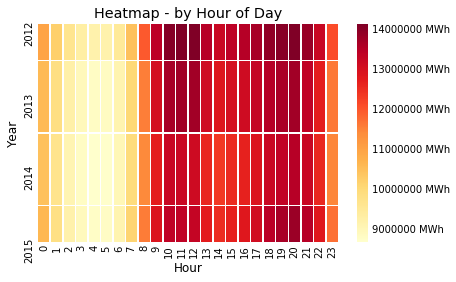

In [16]:
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Hour of Day')

In [17]:
# Create new dataset for heatmap
heatmap_data = daily_data.copy()

# First we need to add weekdays as a column
heatmap_data['Month'] = daily_data.index.month_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Month']).sum()

# Reset index
heatmap_data = heatmap_data.reset_index()

# We drop off 2018 because it's not a full year
heatmap_data = heatmap_data[heatmap_data['Year'] != 2018]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Month', values='Loads')

# Reorder columns
heatmap_data = heatmap_data[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

heatmap_data.head(10)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2012,2.490477e+07,2.537795e+07,2.506907e+07,2.224087e+07,2.343357e+07,2.497058e+07,2.786352e+07,2.412581e+07,2.408338e+07,2.433854e+07,2.335404e+07,2.419663e+07
2013,2.504563e+07,2.339131e+07,2.458992e+07,2.214393e+07,2.307479e+07,2.324019e+07,2.655577e+07,2.278573e+07,2.340932e+07,2.393414e+07,2.323039e+07,2.379816e+07
2014,2.443420e+07,2.260531e+07,2.398441e+07,2.167987e+07,2.273604e+07,2.342132e+07,2.551771e+07,2.133774e+07,2.315980e+07,2.361490e+07,2.273438e+07,2.323696e+07
2015,2.418035e+07,2.273167e+07,2.404417e+07,2.173868e+07,2.239507e+07,2.333915e+07,2.770483e+07,2.210090e+07,2.377296e+07,2.359496e+07,2.333487e+07,2.368530e+07


Text(0.5, 1, 'Heatmap - by Day of Week')

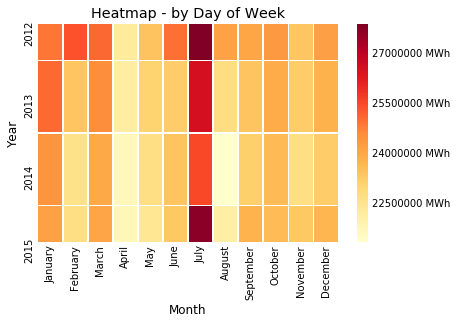

In [18]:
# Visualise electricity load via Heatmap
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Day of Week')

In [19]:
from statsmodels.tsa.stattools import adfuller as ADF

series = daily_data['Loads'] # ADF takes series, not DF

result = ADF(series)

print('ADF Statistic: ', result[0])
print('P-value: {:.20f}'.format(result[1]))

ADF Statistic:  -6.386622661397984
P-value: 0.00000002156296684186


In [20]:
from statsmodels.stats.diagnostic import het_breuschpagan as BP
import statsmodels.api as sm
from statsmodels.formula.api import ols

bp_data = daily_data.copy()
bp_data['Time_Period'] = range(1, len(bp_data)+1) # Convert time series points into consecutive ints

formula = 'Loads ~ Time_Period' # ie PJME MW depends on Time Period (OLS auto adds Y intercept)

# Next we apply Ordinary Linear Square baseline regression model - as baseline test
model = ols(formula, bp_data).fit()

result = BP(model.resid, model.model.exog)

print('ADF Statistic: ', result[0])
print('P-value: {:.20f}'.format(result[1]))

ADF Statistic:  0.012664475074488646
P-value: 0.91039799112499042444


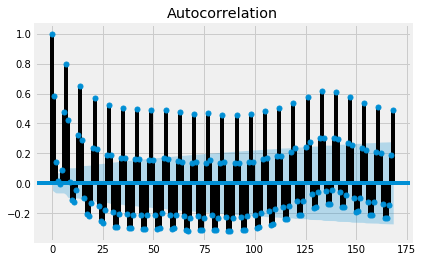

In [21]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#fig, ax = plt.subplots(2,1)

# Plot the acf function
plot_acf(daily_data['Loads'],lags=168) #alpha 1 suppresses CI

plt.show()

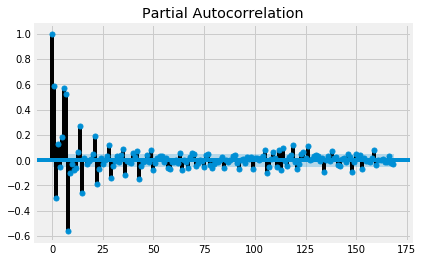

In [22]:
plot_pacf(daily_data['Loads'],lags=168) #alpha 1 suppress CI

plt.show()

In [23]:
# First we split it up between train and test
# We will aim for a 12 month forecast horizon (ie predict the last 12 months in the dataset)
cutoff = '2015-11-30'

daily_data.sort_index()

train = daily_data[:cutoff]
test = daily_data[cutoff:]

# PROPHET

In [24]:
from fbprophet import Prophet

ftrain = train.reset_index().rename(columns={'date':'ds', 'Loads': 'y'}) # Prophet takes ds and y as column names only

model = Prophet(
    n_changepoints=25 # Default is 25
    ,changepoint_prior_scale=0.05 # Default is 0.05
    ,seasonality_mode='additive'
    ,interval_width=0.8 # CI - default is 0.8 or 80%
)
model.fit(ftrain)

# Create the future dataframe with date range that will be used to test accuracy
future_df = test.reset_index()['date'].to_frame().rename(columns={"date":'ds'})

# Predict the future
forecast = model.predict(future_df)
PROPHET_prediction = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']][cutoff:]
PROPHET_prediction = PROPHET_prediction.rename(columns={'yhat': 'Loads'})

print("Finished training and predicting")

ModuleNotFoundError: No module named 'fbprophet'

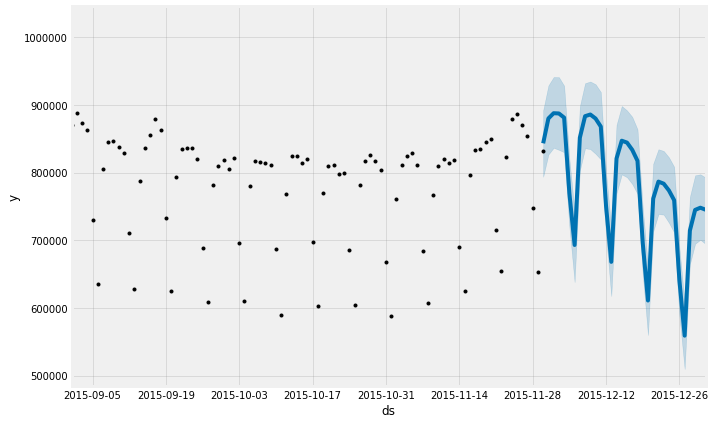

In [26]:
model.plot(forecast)
plt.xlim(datetime(2015, 9, 1),datetime(2015, 12, 31))
plt.show()

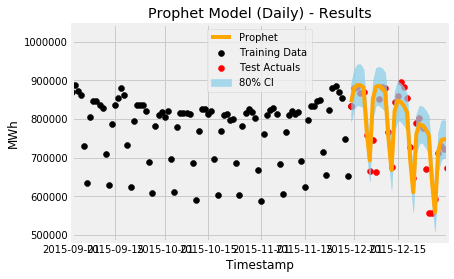

In [29]:
# Let's visually see the results
plt.scatter(x=train.index, y=train['Loads'], label='Training Data', color='black')
plt.scatter(x=test.index, y=test['Loads'], label='Test Actuals', color='red')
plt.plot(PROPHET_prediction['Loads'], label='Prophet', color='orange')

# Plot Confidence Interval
plt.fill_between(
    PROPHET_prediction.index,
    PROPHET_prediction['yhat_lower'],
    PROPHET_prediction['yhat_upper'],
    color='skyblue',
    alpha=0.7, # 70% transparency
    label='80% CI'
)

# Plot Labels, Legends etc
plt.xlabel("Timestamp")
plt.ylabel("MWh")
plt.legend(loc='best')
plt.title('Prophet Model (Daily) - Results')

# For clarify, let's limit to only 2017 onwards
plt.xlim(datetime(2015, 9, 1),datetime(2015, 12, 31))

plt.show()

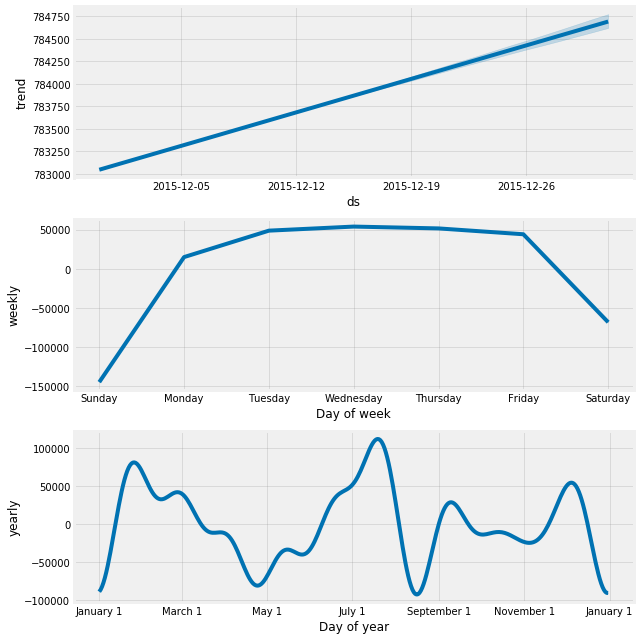

In [30]:
model.plot_components(forecast)

plt.show()

In [36]:
# First construct the residuals - basically the errors
prophet_errors = PROPHET_prediction.copy()
prophet_errors['PJME_MW_ACTUAL'] = test['Loads']
prophet_errors['error'] = prophet_errors['Loads'] - prophet_errors['PJME_MW_ACTUAL']

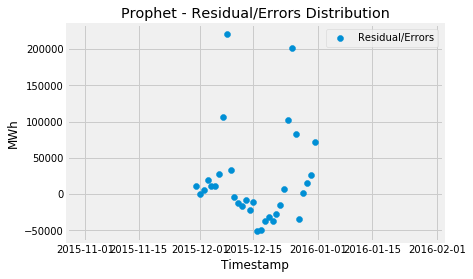

In [38]:
# Let's visually see the errors via scatterplot
plt.scatter(prophet_errors.index, prophet_errors['error'], label='Residual/Errors')

# Plot Labels, Legends etc
plt.title('Prophet - Residual/Errors Distribution')
plt.xlabel("Timestamp")
plt.ylabel("MWh")
plt.legend(loc='best')

plt.show()

Text(0.5, 1.0, 'Prophet - Residual/Errors Distribution')

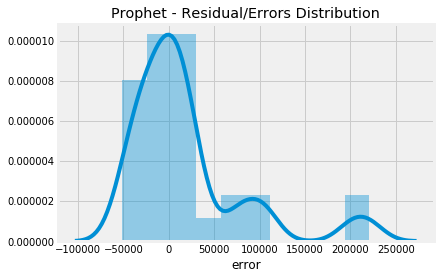

In [39]:
# Plot Histogram with Kernel Density Estimation (KDE)
sns.distplot(prophet_errors['error'], kde=True);

# Plot Labels, Legends etc
plt.title('Prophet - Residual/Errors Distribution')

In [34]:
from statsmodels.tools.eval_measures import meanabs
print("MAE Prophet: {:.2f}".format(meanabs(test['Loads'], PROPHET_prediction['Loads'])))

MAE Prophet: 41098.88


In [36]:
def MAPE(y_true, y_pred): 
    '''Function to calculate MAPE'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [43]:
print("MAPE Prophet: {:.2f}%".format(MAPE(test['Loads'], PROPHET_prediction['Loads'])))

MAPE Prophet: 6.02%


# XGBOOST MULTI

In [130]:
# Feature Engineering first

def preprocess_xgb_data(df, lag_start=1, lag_end=365):
    '''
    Takes data and preprocesses for XGBoost.
    
    :param lag_start default 1 : int
        Lag window start - 1 indicates one-day behind
    :param lag_end default 365 : int
        Lag window start - 365 indicates one-year behind
        
    Returns tuple : (data, target)
    '''
    # Default is add in lag of 365 days of data - ie make the model consider 365 days of prior data
    for i in range(lag_start,lag_end):
        df[f'Loads {i}'] = df.shift(periods=i, freq='D')['Loads']

    df.reset_index(inplace=True)

    # Split out attributes of timestamp - hopefully this lets the algorithm consider seasonality
    df['date_epoch'] = pd.to_numeric(df['date']) # Easier for algorithm to consider consecutive integers, rather than timestamps
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofmonth'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.weekofyear
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    
    x = df.drop(columns=['date', 'Loads']) #Don't need timestamp and target
    y = df['Loads'] # Target prediction is the load
    
    return x, y

In [131]:
example_data = train.copy() #Otherwise it becomes a pointer

example_x, example_y = preprocess_xgb_data(example_data)

example_x.head(10)

,Loads 1,Loads 2,Loads 3,Loads 4,Loads 5,Loads 6,Loads 7,Loads 8,Loads 9,Loads 10,...,Loads 363,Loads 364,date_epoch,dayofweek,dayofmonth,dayofyear,weekofyear,quarter,month,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1325462400000000000,0,2,2,1,1,1,2012
1,760442.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1325548800000000000,1,3,3,1,1,1,2012
2,791960.20,760442.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1325635200000000000,2,4,4,1,1,1,2012
3,790213.19,791960.20,760442.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1325721600000000000,3,5,5,1,1,1,2012
4,778888.18,790213.19,791960.20,760442.62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1325808000000000000,4,6,6,1,1,1,2012
5,655445.74,778888.18,790213.19,791960.20,760442.62,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1325894400000000000,5,7,7,1,1,1,2012
6,682400.54,655445.74,778888.18,790213.19,791960.20,760442.62,NaN,NaN,NaN,NaN,...,NaN,NaN,1325980800000000000,6,8,8,1,1,1,2012
7,633861.58,682400.54,655445.74,778888.18,790213.19,791960.20,760442.62,NaN,NaN,NaN,...,NaN,NaN,1326067200000000000,0,9,9,2,1,1,2012
8,842063.42,633861.58,682400.54,655445.74,778888.18,790213.19,791960.20,760442.62,NaN,NaN,...,NaN,NaN,1326153600000000000,1,10,10,2,1,1,2012
9,891392.54,842063.42,633861.58,682400.54,655445.74,778888.18,790213.19,791960.20,760442.62,NaN,...,NaN,NaN,1326240000000000000,2,11,11,2,1,1,2012


In [132]:
xtrain = train.copy() #Otherwise it becomes a pointer
xtest = test.copy() # Otherwise it becomes a pointer

train_feature, train_label = preprocess_xgb_data(xtrain)
test_feature, test_label = preprocess_xgb_data(xtest)

In [133]:


# So because we need the lag data, we need to preprocess then do the split
all_data = daily_data.copy()

feature, label = preprocess_xgb_data(all_data, lag_start=32, lag_end=90)

# We will aim for a 12 month forecast horizon (ie predict the last 365 days in the dataset)
train_feature = feature[:-32]
train_label = label[:-32]

test_feature = feature[-32:]
test_label = label[-32:]

In [134]:
from sklearn.model_selection import KFold, train_test_split

# We will try with 1000 trees and a maximum depth of each tree to be 5
# Early stop if the model hasn't improved in 100 rounds
model = XGBRegressor(
    max_depth=6 # Default - 6
    ,n_estimators=2000
    ,booster='gbtree'
    ,colsample_bytree=1 # Subsample ratio of columns when constructing each tree - default 1
    ,eta=0.3 # Learning Rate - default 0.3
    ,importance_type='gain' # Default is gain
)
model.fit(
    train_feature
    ,train_label
    ,eval_set=[(train_feature, train_label)]
    ,eval_metric='mae'
    ,verbose=True
    ,early_stopping_rounds=100 # Stop after 100 rounds if it doesn't after 100 times
)

xtest['Loads Prediction'] = model.predict(test_feature)
XGB_prediction_no_lag = xtest[['date', 'Loads Prediction']].set_index('date')
XGB_prediction_no_lag = XGB_prediction_no_lag.rename(columns={'Loads Prediction': 'Loads'})


[0]	validation_0-mae:547511.37500
Will train until validation_0-mae hasn't improved in 100 rounds.
[1]	validation_0-mae:384219.15625
[2]	validation_0-mae:269530.43750
[3]	validation_0-mae:189699.70312
[4]	validation_0-mae:134060.60938
[5]	validation_0-mae:94906.32031
[6]	validation_0-mae:67576.79688
[7]	validation_0-mae:48630.82812
[8]	validation_0-mae:35279.83203
[9]	validation_0-mae:26344.53711
[10]	validation_0-mae:20264.18555
[11]	validation_0-mae:16189.85156
[12]	validation_0-mae:13452.64453
[13]	validation_0-mae:11661.97168
[14]	validation_0-mae:10580.50879
[15]	validation_0-mae:9741.17676
[16]	validation_0-mae:9126.43164
[17]	validation_0-mae:8491.79785
[18]	validation_0-mae:8025.70850
[19]	validation_0-mae:7736.12451
[20]	validation_0-mae:7321.05029
[21]	validation_0-mae:7221.19043
[22]	validation_0-mae:6951.45361
[23]	validation_0-mae:6741.75342
[24]	validation_0-mae:6662.91504
[25]	validation_0-mae:6576.57422
[26]	validation_0-mae:6386.18750
[27]	validation_0-mae:6332.57227
[

[247]	validation_0-mae:50.26650
[248]	validation_0-mae:49.77020
[249]	validation_0-mae:48.55364
[250]	validation_0-mae:47.44842
[251]	validation_0-mae:46.22971
[252]	validation_0-mae:45.89305
[253]	validation_0-mae:44.74239
[254]	validation_0-mae:43.86034
[255]	validation_0-mae:42.90248
[256]	validation_0-mae:42.03970
[257]	validation_0-mae:40.71884
[258]	validation_0-mae:39.40408
[259]	validation_0-mae:38.57237
[260]	validation_0-mae:38.02156
[261]	validation_0-mae:37.50350
[262]	validation_0-mae:37.20761
[263]	validation_0-mae:36.04631
[264]	validation_0-mae:35.58410
[265]	validation_0-mae:34.55401
[266]	validation_0-mae:33.21910
[267]	validation_0-mae:32.71901
[268]	validation_0-mae:32.59721
[269]	validation_0-mae:32.27517
[270]	validation_0-mae:31.70840
[271]	validation_0-mae:31.39492
[272]	validation_0-mae:31.20402
[273]	validation_0-mae:30.61752
[274]	validation_0-mae:29.82117
[275]	validation_0-mae:29.11898
[276]	validation_0-mae:28.77790
[277]	validation_0-mae:28.05874
[278]	va

[509]	validation_0-mae:0.41457
[510]	validation_0-mae:0.40625
[511]	validation_0-mae:0.39413
[512]	validation_0-mae:0.38907
[513]	validation_0-mae:0.37835
[514]	validation_0-mae:0.36819
[515]	validation_0-mae:0.36329
[516]	validation_0-mae:0.35568
[517]	validation_0-mae:0.34802
[518]	validation_0-mae:0.34478
[519]	validation_0-mae:0.34255
[520]	validation_0-mae:0.34084
[521]	validation_0-mae:0.33576
[522]	validation_0-mae:0.33073
[523]	validation_0-mae:0.32178
[524]	validation_0-mae:0.31661
[525]	validation_0-mae:0.30917
[526]	validation_0-mae:0.30230
[527]	validation_0-mae:0.29596
[528]	validation_0-mae:0.29456
[529]	validation_0-mae:0.29219
[530]	validation_0-mae:0.28506
[531]	validation_0-mae:0.27954
[532]	validation_0-mae:0.27530
[533]	validation_0-mae:0.27271
[534]	validation_0-mae:0.26707
[535]	validation_0-mae:0.26497
[536]	validation_0-mae:0.26007
[537]	validation_0-mae:0.25613
[538]	validation_0-mae:0.25201
[539]	validation_0-mae:0.24707
[540]	validation_0-mae:0.24142
[541]	va

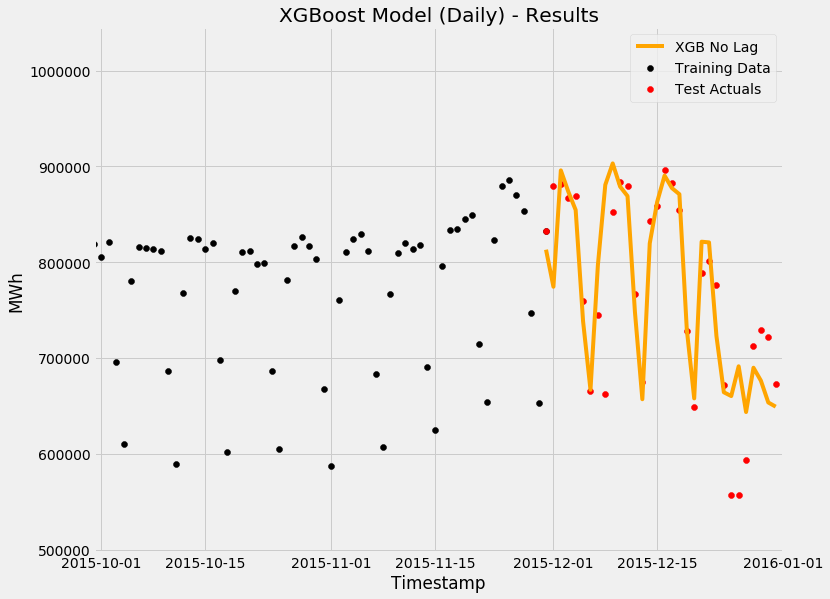

In [135]:
# Let's visually see the results
plt.scatter(x=train.index, y=train['Loads'], label='Training Data', color='black')
plt.scatter(x=test.index, y=test['Loads'], label='Test Actuals', color='red')
plt.plot(XGB_prediction_no_lag, label='XGB No Lag', color='orange')

# Plot Labels, Legends etc
plt.xlabel("Timestamp")
plt.ylabel("MWh")
plt.legend(loc='best')
plt.title('XGBoost Model (Daily) - Results')

# For clarify, let's limit to only 2015 onwards
plt.xlim(datetime(2015, 9, 30),datetime(2016, 1, 1))

plt.show()

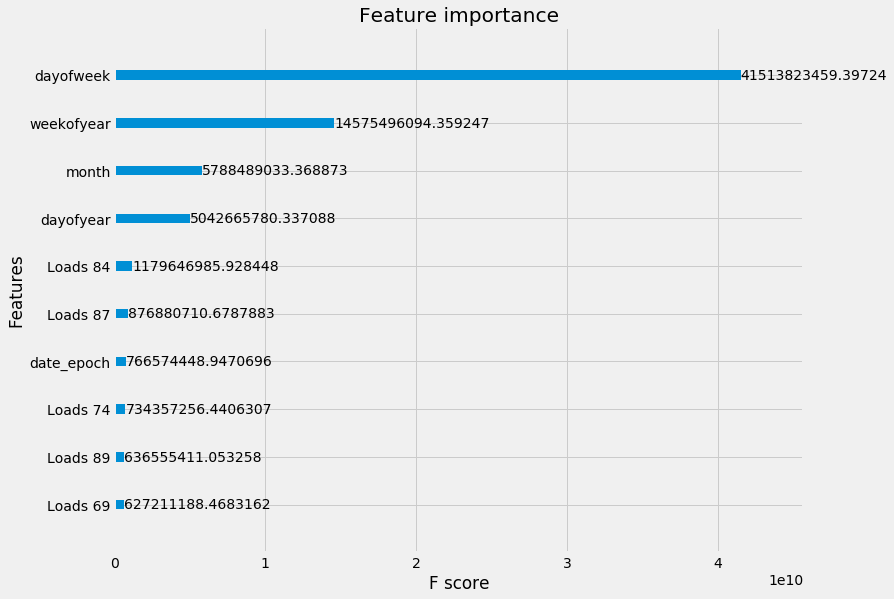

In [136]:
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10, importance_type='gain') # gain is how much each feature contributed to 'improvement' of tree

plt.show()

In [137]:
print("MAE XGBoost: {:.2f}".format(mean_absolute_error(test_label, XGB_prediction_no_lag['Loads'])))

def MAPE(y_true, y_pred): 
    '''Function to calculate MAPE'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE XGBoost: {:.2f}%".format(MAPE(test['Loads'], XGB_prediction_no_lag['Loads'])))

MAE XGBoost: 37123.10
MAPE XGBoost: 5.34%


Text(0.5, 1.0, 'XGBoost - Residual/Errors Distribution')

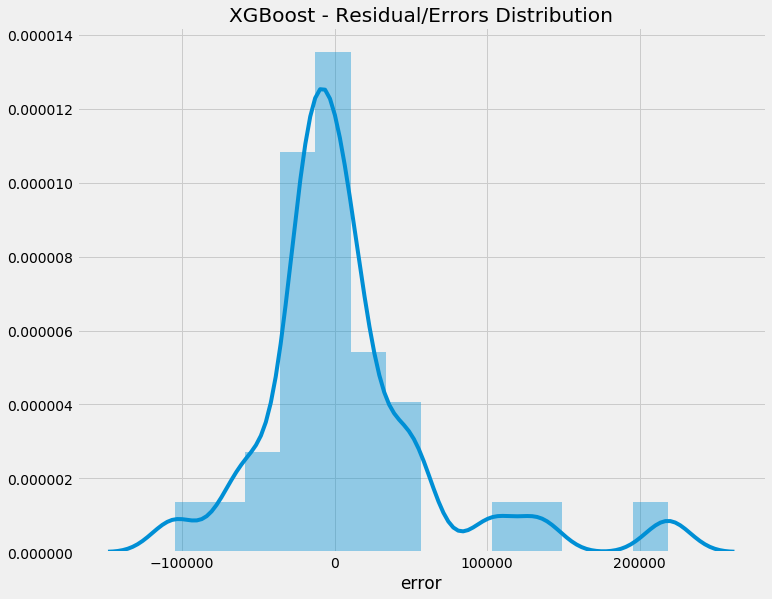

In [138]:
# First construct the residuals - basically the errors
xgboost_errors = XGB_prediction_no_lag.copy()
xgboost_errors['Loads_ACTUAL'] = test.copy()
xgboost_errors['error'] = xgboost_errors['Loads'] - xgboost_errors['Loads_ACTUAL']

# Plot Histogram with Kernel Density Estimation (KDE)
sns.distplot(xgboost_errors['error'], kde=True);

# Plot Labels, Legends etc
plt.title('XGBoost - Residual/Errors Distribution')

# SARIMA

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import meanabs

# Equivalent to R's Auto ARIMA to get the optimal parameters
#import pmdarima as pm
#model = pm.auto_arima(htrain, seasonal=True, stationary=True, stepwise=True, trace=True, suppress_warnings=True)

# First we split it up between train and test
htrain = train['Loads'] # SARIMAX takes series, not DF
htest = test['Loads'] # SARIMAX takes series, not DF

# Next define hyperparameters. Default is AR model (1,0,0)(0,0,0,0)
p = 1 # AR order
d = 0 # I degree
q = 1 # MA window
P = 0 # AR seasonal order
D = 1 # I seasonal order
Q = 2 # MA seasonal order
m = 6 # Seasonality period length

model = SARIMAX(
    htrain,
    order=(p, d, q),
    seasonal_order=(P, D, Q, m)
    ,enforce_stationarity=False
    ,enforce_invertibility=False
).fit(
    maxiter=50 # Default is 50
)

results = model.get_prediction(start=htest.index[0], end=htest.index[-1], dynamic=False)
SARIMA_prediction_CI = results.conf_int(alpha=(1-0.8)) # 80% CI
SARIMA_prediction = results.predicted_mean
SARIMA_prediction = SARIMA_prediction.to_frame().rename(columns={0: 'Loads'})

# Evaluate it's performance using Mean Absolute Error (MAE)
print("Finished training and predicting. MAE SARIMA: {:.20f}. AIC: {}. Parameters: p,d,q,P,D,Q,m: ".format(meanabs(htest, SARIMA_prediction['Loads']), model.aic), p,d,q,P,D,Q,m)

C:\Users\matti\Anaconda3..25.02.20\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Finished training and predicting. MAE SARIMA: 96695.29658713701064698398. AIC: 35897.00113111465. Parameters: p,d,q,P,D,Q,m:  1 0 1 0 1 2 6


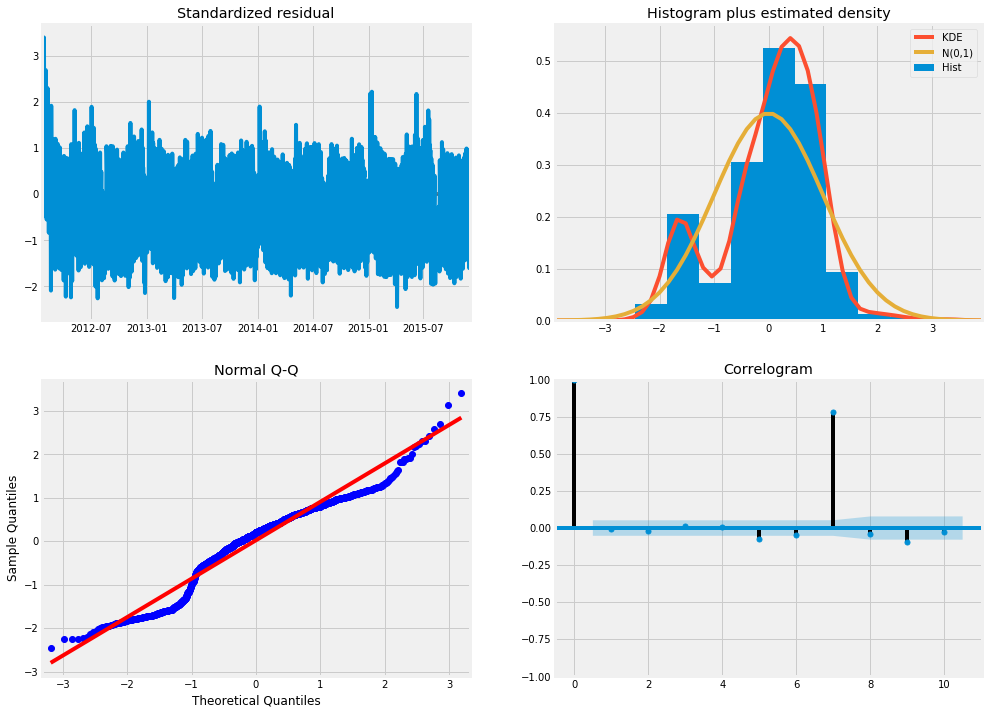

In [30]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [32]:
# Evaluate it's performance using Mean Absolute Error (MAE)
from statsmodels.tools.eval_measures import meanabs

print("MAE SARIMA: {:.20f}".format(meanabs(htest, SARIMA_prediction['Loads'])))

MAE SARIMA: 96695.29658713701064698398


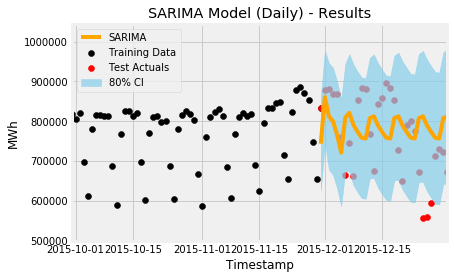

In [34]:
# Let's visually see the results
plt.scatter(x=train.index, y=train['Loads'], label='Training Data', color='black')
plt.scatter(x=test.index, y=test['Loads'], label='Test Actuals', color='red')
plt.plot(SARIMA_prediction['Loads'], label='SARIMA', color='orange')

# Plot Confidence Interval
plt.fill_between(
    SARIMA_prediction.index,
    SARIMA_prediction_CI['lower Loads'],
    SARIMA_prediction_CI['upper Loads'],
    color='skyblue',
    alpha=0.7, # 70% transparency
    label='80% CI'
)

# Plot Labels, Legends etc
plt.xlabel("Timestamp")
plt.ylabel("MWh")
plt.legend(loc='best')
plt.title('SARIMA Model (Daily) - Results')

# For clarify, let's limit to only 2017 onwards
plt.xlim(datetime(2015, 9, 30),datetime(2015, 12, 31))

plt.show()